In [30]:
import torch
from torch_geometric.data import Data

edge_index = torch.tensor([[0, 1],
                           [1, 0],
                           [1, 2],
                           [2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)
data = Data(x=x, edge_index=edge_index)

In [31]:
data

Data(x=[3, 1], edge_index=[4, 2])

In [8]:
data.num_nodes

3

In [9]:
data.num_edges


4

In [10]:
data.is_directed()


False

In [11]:
device = torch.device('cuda')
data = data.to(device)

In [13]:
from typing import Callable, Optional

import torch

from torch_geometric.data import Data, InMemoryDataset

In [14]:
class KarateClub(InMemoryDataset):
    def __init__(self, transform: Optional[Callable] = None):
        super().__init__('.', transform)

        row = [
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4,
            5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 10, 10,
            10, 11, 12, 12, 13, 13, 13, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17,
            18, 18, 19, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 23, 23, 23, 24,
            24, 24, 25, 25, 25, 26, 26, 27, 27, 27, 27, 28, 28, 28, 29, 29, 29,
            29, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32,
            32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33,
            33, 33, 33, 33, 33, 33
        ]
        col = [
            1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31, 0, 2, 3, 7,
            13, 17, 19, 21, 30, 0, 1, 3, 7, 8, 9, 13, 27, 28, 32, 0, 1, 2, 7,
            12, 13, 0, 6, 10, 0, 6, 10, 16, 0, 4, 5, 16, 0, 1, 2, 3, 0, 2, 30,
            32, 33, 2, 33, 0, 4, 5, 0, 0, 3, 0, 1, 2, 3, 33, 32, 33, 32, 33, 5,
            6, 0, 1, 32, 33, 0, 1, 33, 32, 33, 0, 1, 32, 33, 25, 27, 29, 32,
            33, 25, 27, 31, 23, 24, 31, 29, 33, 2, 23, 24, 33, 2, 31, 33, 23,
            26, 32, 33, 1, 8, 32, 33, 0, 24, 25, 28, 32, 33, 2, 8, 14, 15, 18,
            20, 22, 23, 29, 30, 31, 33, 8, 9, 13, 14, 15, 18, 19, 20, 22, 23,
            26, 27, 28, 29, 30, 31, 32
        ]
        edge_index = torch.tensor([row, col])

        y = torch.tensor([  # Create communities.
            1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1,
            0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0
        ])

        x = torch.eye(y.size(0), dtype=torch.float)

        # Select a single training node for each community
        # (we just use the first one).
        train_mask = torch.zeros(y.size(0), dtype=torch.bool)
        for i in range(int(y.max()) + 1):
            train_mask[(y == i).nonzero(as_tuple=False)[0]] = True

        data = Data(x=x, edge_index=edge_index, y=y, train_mask=train_mask)

        self.data, self.slices = self.collate([data])

In [15]:
dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4


In [24]:
# Print first element
print(f'Graph: {dataset[0]}')

Graph: Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


In [25]:
data = dataset[0]

print(f'x = {data.x.shape}')
print(data.x)

x = torch.Size([34, 34])
tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])


In [26]:
from torch_geometric.utils import to_dense_adj

A = to_dense_adj(data.edge_index)[0].numpy().astype(int)
print(f'A = {A.shape}')
print(A)

A = (34, 34)
[[0 1 1 ... 1 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 1]
 [0 0 0 ... 1 1 0]]


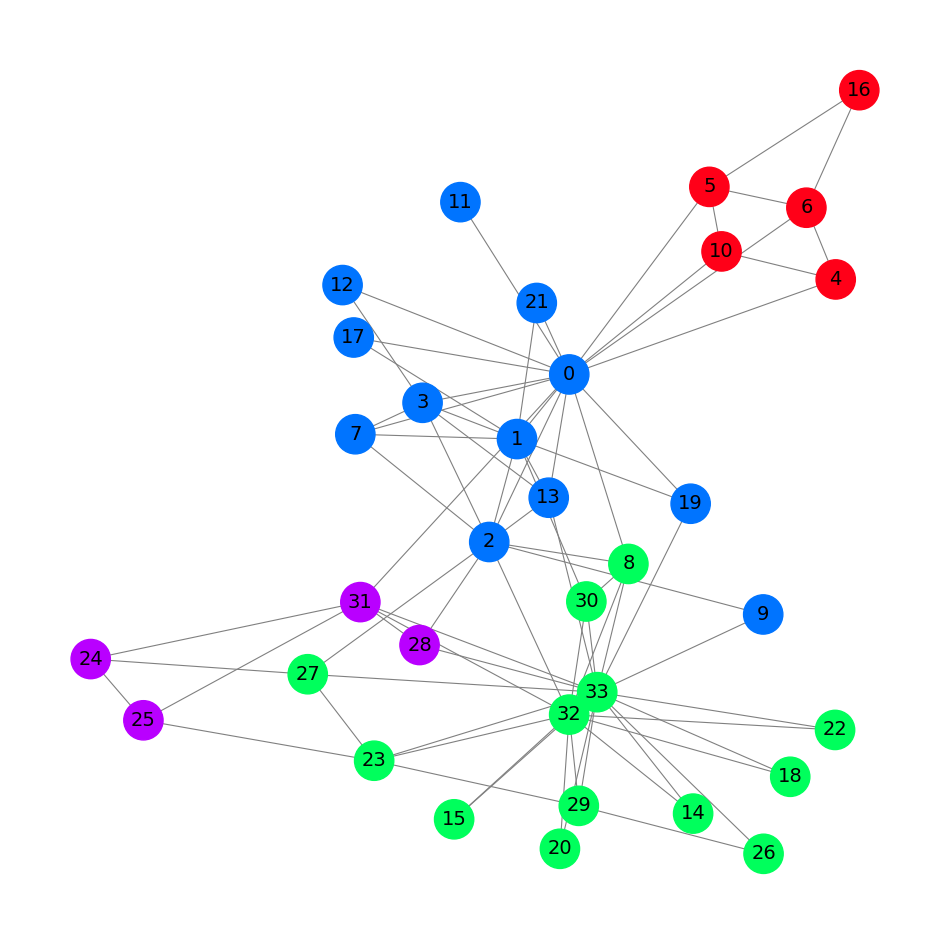

In [27]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
plt.figure(figsize=(12,12))
plt.axis('off')
nx.draw_networkx(G,
                pos=nx.spring_layout(G, seed=0),
                with_labels=True,
                node_size=800,
                node_color=data.y,
                cmap="hsv",
                vmin=-2,
                vmax=3,
                width=0.8,
                edge_color="grey",
                font_size=14
                )
plt.show()

### From Networkx to PyG

In [28]:
import networkx as nx
import numpy as np
import torch
from torch_geometric.utils.convert import from_networkx


# Make the networkx graph
G = nx.Graph()

# Add some cars (just do 4 for now)
G.add_nodes_from([
      (1, {'y': 1, 'x': 0.5}),
      (2, {'y': 2, 'x': 0.2}),
      (3, {'y': 3, 'x': 0.3}),
      (4, {'y': 4, 'x': 0.1}),
      (5, {'y': 5, 'x': 0.2}),
])

# Add some edges
G.add_edges_from([
                  (1, 2), (1, 4), (1, 5),
                  (2, 3), (2, 4),
                  (3, 2), (3, 5),
                  (4, 1), (4, 2),
                  (5, 1), (5, 3)
])

# Convert the graph into PyTorch geometric
pyg_graph = from_networkx(G)

print(pyg_graph)
# Data(edge_index=[2, 12], x=[5], y=[5])
print(pyg_graph.x)
# tensor([0.5000, 0.2000, 0.3000, 0.1000, 0.2000])
print(pyg_graph.y)
# tensor([1, 2, 3, 4, 5])
print(pyg_graph.edge_index)

Data(x=[5], edge_index=[2, 12], y=[5])
tensor([0.5000, 0.2000, 0.3000, 0.1000, 0.2000])
tensor([1, 2, 3, 4, 5])
tensor([[0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 4, 4],
        [1, 3, 4, 0, 2, 3, 1, 4, 0, 1, 0, 2]])
